## Libraries

In [0]:
from imgaug import augmenters as iaug


In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

## Image Augmentation

To increase Dataset, as it is very small

In [0]:
seq = iaug.Sequential([
    iaug.Crop(px=(0, 16)), # Cropping images from each side by 0 to 16px (randomly chosen)
    iaug.Fliplr(0.4),      # Horizontally flip 40% of the images
    iaug.PiecewiseAffine(scale=(0.01, 0.05)),    # Piecewise Affine Trnsformations
    iaug.Affine(                                     # Affine Transformations
        scale={"x": (1.0, 1.2), "y": (1.0, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
    )
])

In [0]:
batch = img1.reshape((1,*img1.shape))     # Batch of 4D Tensor 
batch.shape                                  

(1, 982, 814, 3)

## Dataset for Image Data Generator

In [0]:
!wget https://www.dropbox.com/sh/dcu81abccge3hsr/AAAtm7aIwSZY78scu6e222NGa?dl=0

--2020-03-15 10:32:49--  https://www.dropbox.com/sh/dcu81abccge3hsr/AAAtm7aIwSZY78scu6e222NGa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/dcu81abccge3hsr/AAAtm7aIwSZY78scu6e222NGa [following]
--2020-03-15 10:32:49--  https://www.dropbox.com/sh/raw/dcu81abccge3hsr/AAAtm7aIwSZY78scu6e222NGa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7b0462c167e3fb7350aa119873.dl.dropboxusercontent.com/zip_download_get/AXXhiLvbDEOPzbQfqAhbSJScWY1DwXNziKh8OgSRtG_YM9skbvjbVqNiiygg2bE7ueQ1x5nqq76WlaYqE3WDHd9hCPnrzb2Uj0XnVvUUqBu1Yg [following]
--2020-03-15 10:32:50--  https://uc7b0462c167e3fb7350aa119873.dl.dropboxusercontent.com/zip_download_get/AXXhiLvbDEOPzbQfqAhbSJScWY1DwXNziKh8OgSRtG_YM9skbvjbVqNiiygg2bE7ueQ1x5nqq76WlaYqE3WD

In [0]:
!ls

 296.jpg   297.jpg  'AAAtm7aIwSZY78scu6e222NGa?dl=0'   sample_data


In [0]:
!mv AAAtm7aIwSZY78scu6e222NGa?dl=0 Pokedata.zip

In [0]:
!ls

296.jpg  297.jpg  Pokedata.zip	sample_data


In [0]:
!unzip Pokedata.zip

Archive:  Pokedata.zip
mapname:  conversion of  failed
   creating: Val/
   creating: Train/
   creating: Val/Pikachu/
   creating: Val/Bulbasaur/
   creating: Train/Pikachu/
   creating: Val/Charmender/
   creating: Train/Bulbasaur/
   creating: Train/Charmender/
 extracting: Val/Pikachu/2014.jpg    
 extracting: Val/Pikachu/2024.jpg    
 extracting: Val/Pikachu/2001.jpg    
 extracting: Val/Pikachu/2034.jpg    
 extracting: Val/Pikachu/2027.jpg    
 extracting: Val/Pikachu/2015.jpg    
 extracting: Val/Pikachu/2021.jpg    
 extracting: Val/Pikachu/2006.jpg    
 extracting: Val/Pikachu/2038.jpg    
 extracting: Val/Pikachu/2004.jpg    
 extracting: Val/Pikachu/2039.jpg    
 extracting: Val/Pikachu/2032.jpg    
 extracting: Val/Pikachu/2036.jpg    
 extracting: Val/Pikachu/2011.jpg    
 extracting: Val/Pikachu/2005.jpg    
 extracting: Val/Pikachu/2028.jpg    
 extracting: Val/Pikachu/2009.jpg    
 extracting: Val/Pikachu/2017.jpg    
 extracting: Val/Pikachu/2026.jpg    
 extracting: 

In [0]:
!ls

296.jpg  297.jpg  Pokedata.zip	sample_data  Train  Val


### Sample Augmented Image Plots 

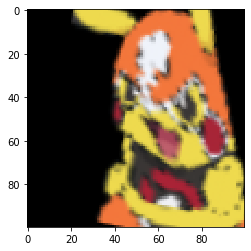

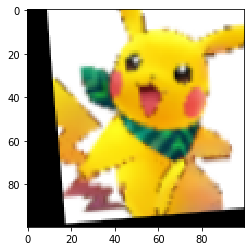

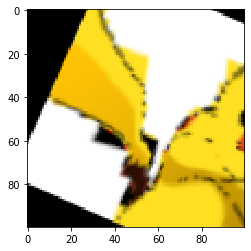

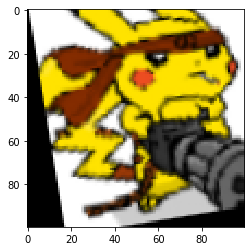

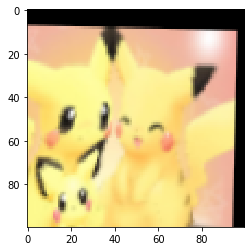

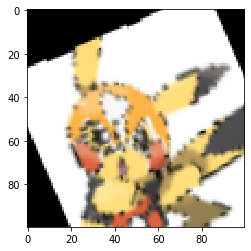

In [0]:
import os


TrainPath = "Train/Pikachu"
for cnt,f in enumerate(os.listdir(TrainPath)):
    img =  image.load_img(os.path.join(TrainPath,f),target_size=(100,100))
    img = image.img_to_array(img)/255.0
    batch = img.reshape((1,*img.shape))
    img = seq(images=batch)
    plt.imshow(img[0])
    plt.show()
    if(cnt==5):
        break

## CNN Model

In [0]:
# Model
from keras.models import Sequential
from keras.layers import *

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)               

In [0]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

## Data Generator

In [0]:
## Data Preparation using Keras -> ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory('Train',batch_size=32,target_size=(100,100),
                                          class_mode='categorical',shuffle=True)


val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = val_datagen.flow_from_directory('Val',class_mode='categorical',batch_size=32,
                                                target_size=(100,100),shuffle=True)

Found 304 images belonging to 3 classes.
Found 123 images belonging to 3 classes.


### Image SubPlots

(32, 100, 100, 3) (32, 3)


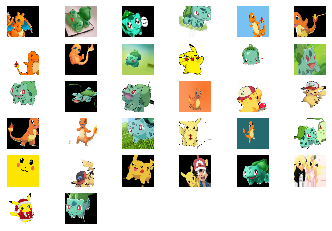

(32, 100, 100, 3) (32, 3)


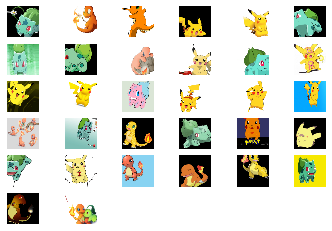

(32, 100, 100, 3) (32, 3)


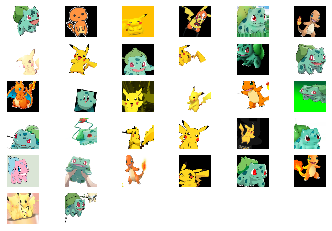

(32, 100, 100, 3) (32, 3)


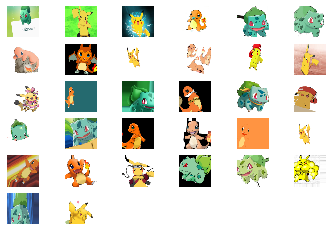

In [0]:
for cnt,(x,y) in enumerate(train_generator):
    
    print(x.shape,y.shape)
    for i in range(32):
        plt.subplot(6,6,i+1)
        plt.imshow(x[i])
        plt.axis("off")
    plt.show()

    if(cnt==3):
        break


In [0]:
train_generator.class_indices
name2idx = dict(train_generator.class_indices)
idx2name = dict((name2idx[k],k) for k in name2idx.keys())    # Reverse Dictionary
print(idx2name)

## Training

In [0]:
from keras.callbacks import TensorBoard      # TensorBoard CallBack

tb = TensorBoard("./logs")

hist = model.fit_generator(train_generator,epochs=5,steps_per_epoch=10,shuffle=True,
                          validation_data=val_generator,validation_steps=4,callbacks=[tb])

Epoch 1/5
 5/10 [==============>...............] - ETA: 5s - loss: 0.3655 - acc: 0.8812

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/10 [==============================] - 10s 969ms/step - loss: 0.3461 - acc: 0.8596 - val_loss: 0.4037 - val_acc: 0.8618
Epoch 2/5
10/10 [==============================] - 10s 966ms/step - loss: 0.3190 - acc: 0.8810 - val_loss: 0.3554 - val_acc: 0.8943
Epoch 3/5
10/10 [==============================] - 10s 982ms/step - loss: 0.3060 - acc: 0.8941 - val_loss: 0.3211 - val_acc: 0.9106
Epoch 4/5
10/10 [==============================] - 10s 951ms/step - loss: 0.2723 - acc: 0.9218 - val_loss: 0.3565 - val_acc: 0.8780
Epoch 5/5
10/10 [==============================] - 10s 956ms/step - loss: 0.2415 - acc: 0.9372 - val_loss: 0.3173 - val_acc: 0.9187


## Val Accuracy : 92% 

#### Overfitting starts at 8 epochs.